# SC4003 CE/CZ4046 INTELLIGENT AGENTS - Assignment 1


This Jupyter notebook is used to present the usage of the algorithms implemented for the assignment. The algorithms are implemented in the `algorithms` folder. The algorithms are implemented in the following files:
1. `value_iteration.py` - Value Iteration algorithm
2. `policy_iteration.py` - Policy Iteration algorithm

Also, this notebook main purpose is to visualize the results of the algorithms. The same results are also presented in the report.

## 1. Introduction

Environment:
The environment in the assignment is a 6x6 grid maze with 4 different types of cells:
1. Normal cell (The white empty cells)
2. Wall cell (The grey cells)
3. Reward cell (The green cells)
4. Hole/Penalty cell (The orange cells)

Actions:
The agent can move in 4 directions: up, down, left, right. The agent cannot move into a wall cell or go outside the grid.

Transition Model:
The transition model of the agent in the environment is as follows:
1. The agent moves in the intended direction with a probability of 0.8
2. The agent moves in either of the right or left direction of the intended direction with a probability of 0.1 each

Terminal State:
There is no terminal state in the environment. The agent can move in the environment infinitely. Also, none of the cells disappear or change their type.

Rewards:
1. Reward cell: +1
2. Hole/Penalty cell: -1
3. Normal cell: -0.04

## 2. Value Iteration

Importing the required libraries for the value iteration algorithm and visualization of the results.

In [1]:
from config import *
from algorithms.value_iteration import *
from algorithms.algorithm_utils import *
import pandas as pd
import matplotlib.pyplot as plt

pygame-ce 2.4.1 (SDL 2.28.5, Python 3.8.18)


Visualizing the maze environment

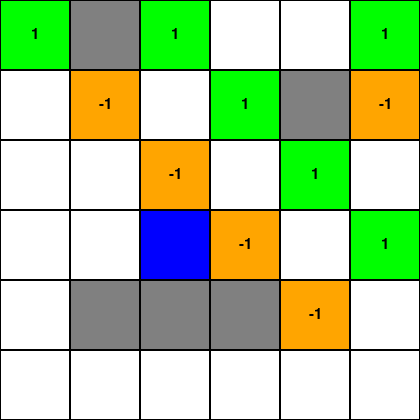

In [2]:
# Import the PIL library to visualize the environment
from PIL import Image

set_maze_config('base')
base_env_image_name = 'base_env'

# Run the function to visualize the environment and save the screenshot for later use
visualize_env(base_env_image_name)

# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + f'{base_env_image_name}.png')
img

Now initialize the environment and run the value iteration algorithm to find the optimal policy and utility values.

In [3]:
vi_env = init_vi_env()  # Initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env)  # Perform value iteration
vi_policy = generate_policy(vi_env)  # Generate the optimal policy
print(f'Value Iteration converged in {vi_iterations_cnt} iterations')

Value Iteration converged in 1145 iterations


Visualizing the optimal policy

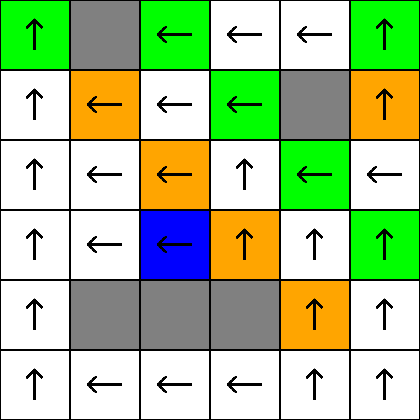

In [4]:
vi_policy_image_name = 'value_iteration_policy'
visualize_policy(vi_policy, vi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{vi_policy_image_name}.png')
img

Visualizing the utility values

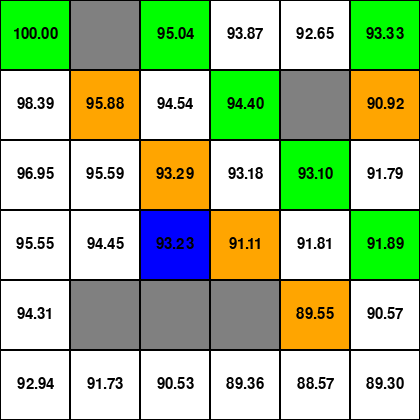

In [5]:
vi_utility_image_name = 'value_iteration_utility'
visualize_utility(vi_env, vi_utility_image_name)  # Visualize the utility values and save the screenshot for later use

# Load the screenshot of the utility values 
img = Image.open(get_path() + '/window_capture/' + f'{vi_utility_image_name}.png')
img

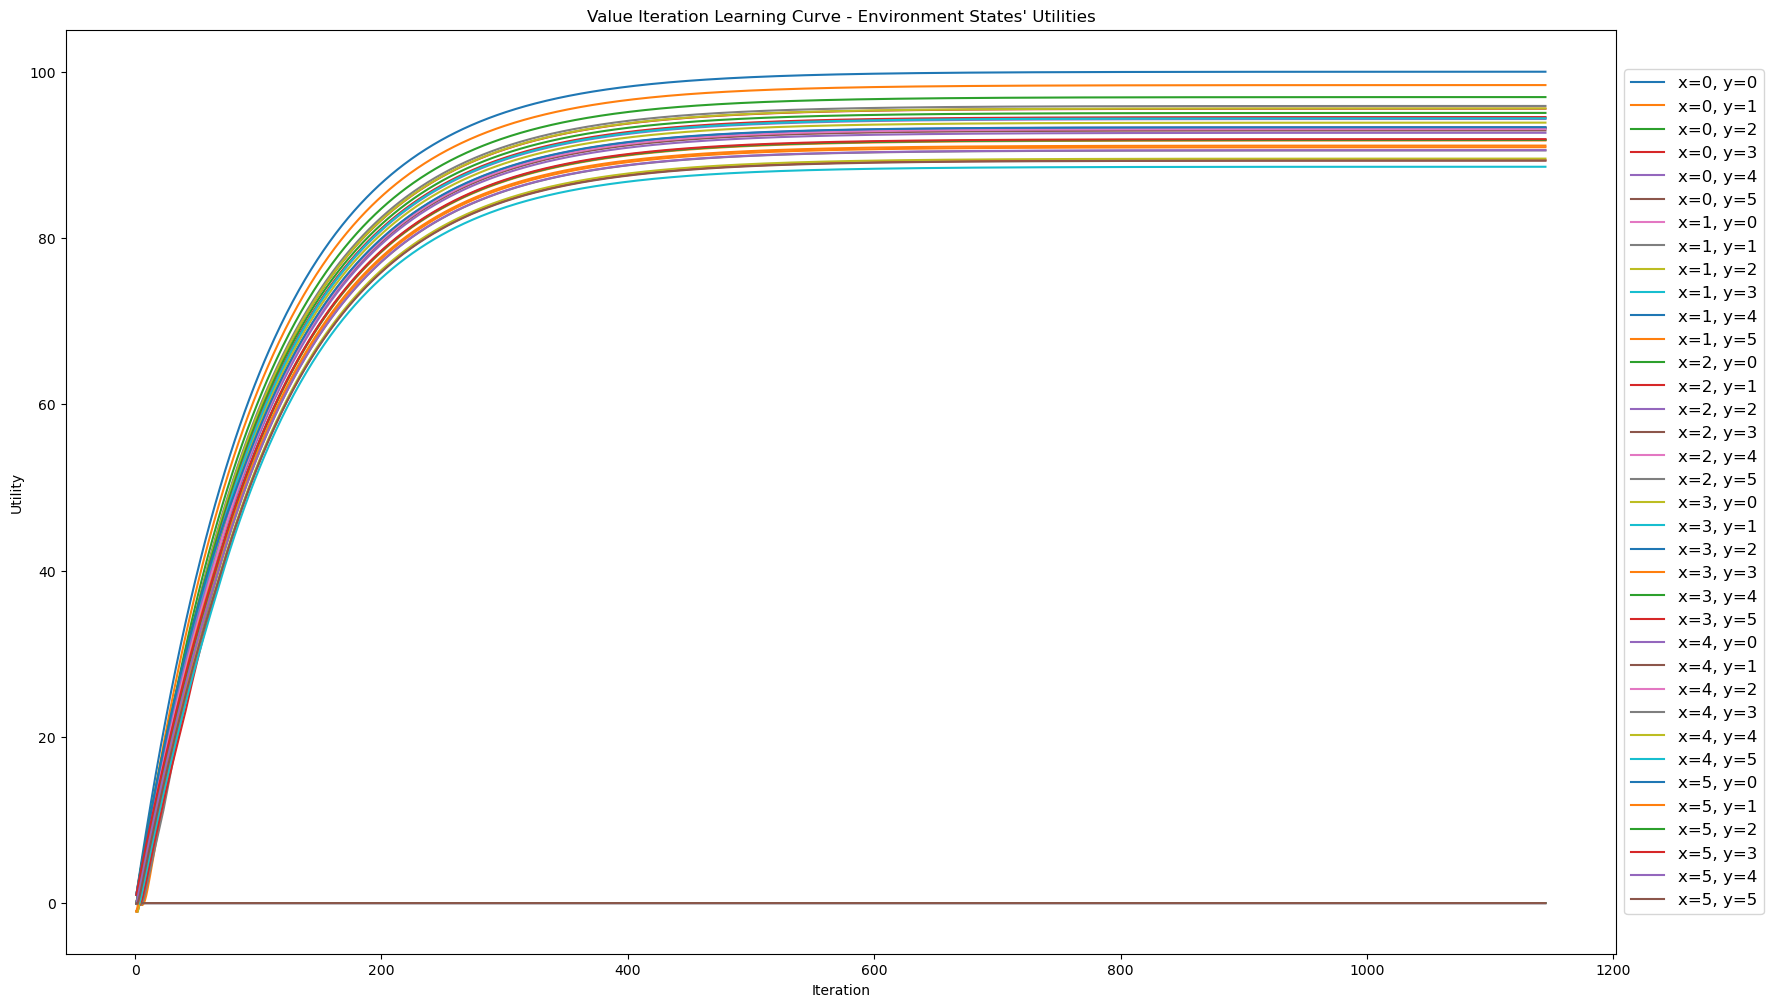

In [6]:
# Visualize the learning curve of the value iteration algorithm
vi_results = pd.read_csv(get_path() + '/results/value_iteration/vi_results.csv')

# Group the results by the 'x' and 'y' columns
groups = vi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Value Iteration Learning Curve - Environment States' Utilities")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.show()


## 3. Policy Iteration

In [7]:
from algorithms.policy_iteration import *

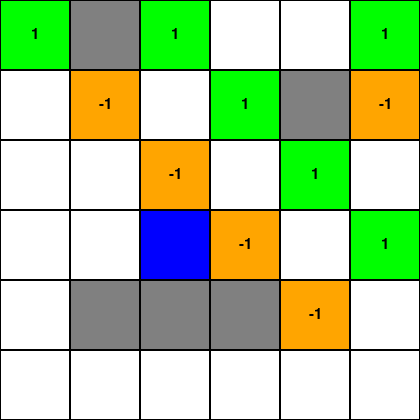

In [8]:
# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + 'base_env.png')
img

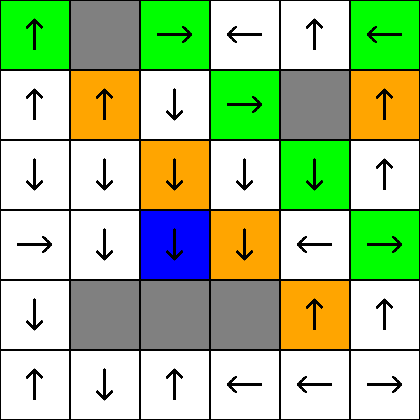

In [9]:
pi_env, pi_policy = init_pi_env()

pi_policy_initial_image_name = 'policy_iteration_policy_initial'
visualize_policy(pi_policy, pi_policy_initial_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{pi_policy_initial_image_name}.png')
img

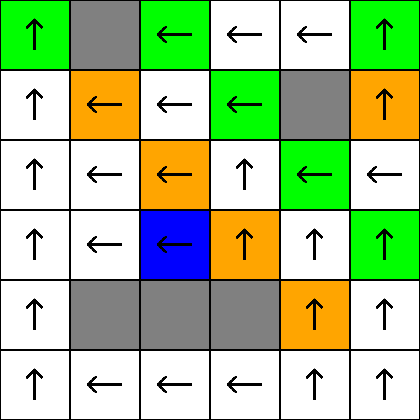

In [10]:
pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy)

pi_policy_image_name = 'policy_iteration_policy'
visualize_policy(pi_policy, pi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{pi_policy_image_name}.png')
img

In [11]:
print(f'Policy Iteration converged in {pi_iterations_cnt} iterations')

Policy Iteration converged in 6 iterations


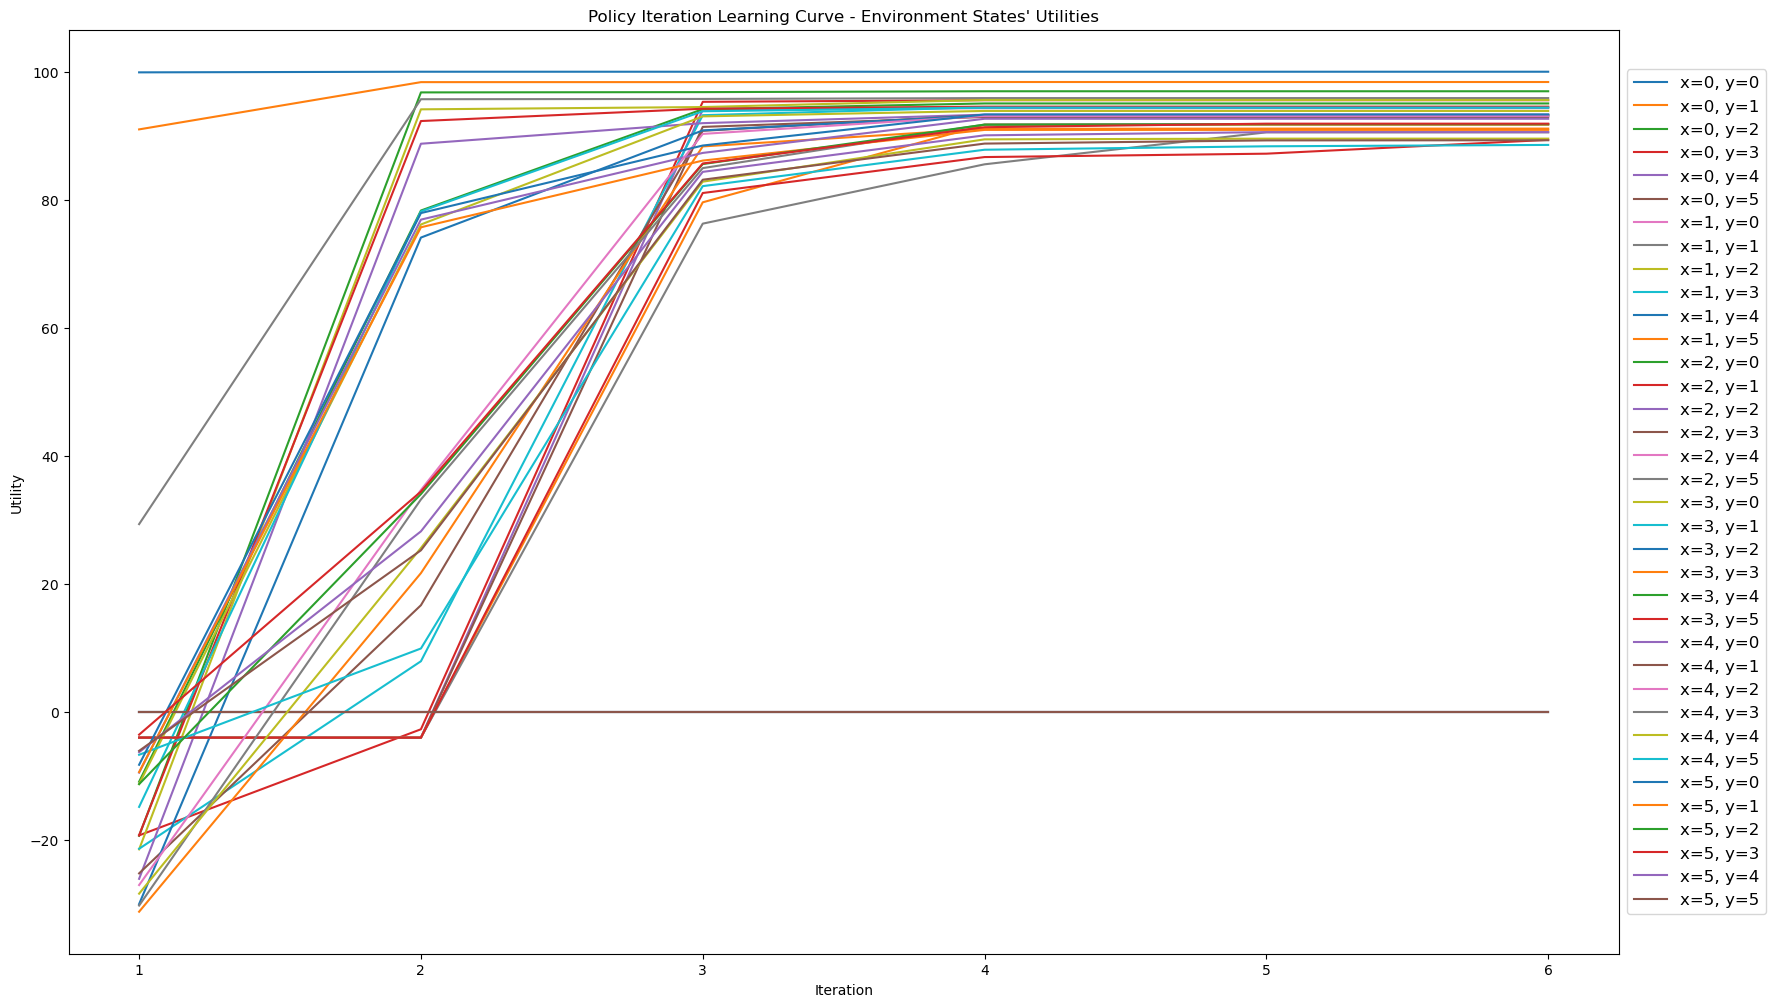

In [12]:
# Visualize the learning curve of the policy iteration algorithm
pi_results = pd.read_csv(get_path() + '/results/policy_iteration/pi_results.csv')

# Group the results by the 'x' and 'y' columns
groups = pi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Policy Iteration Learning Curve - Environment States' Utilities")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.show()


## 4. Task 2 - Complex Environment

The goal of this task is to design a more complex environment and re-run the Value Iteration and Policy Iteration algorithms to compare the results with the previous environment.

### 2.1 Increase the Maze Size

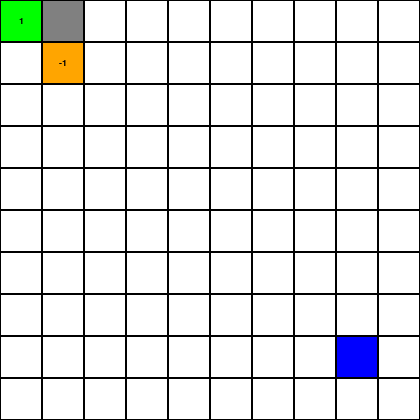

In [13]:
# Change the MAZE_CONFIG value
set_maze_config('increased_size')

increased_size_env_image_name = 'increased_size_env'

# Run the function to visualize the environment and save the screenshot for later use
visualize_env(increased_size_env_image_name)

# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + f'{increased_size_env_image_name}.png')
img